In [1]:
import numpy as np

In [2]:
import pandas as pd 

In [7]:
df = pd.read_csv('../data/train.csv')

In [8]:
test_df = pd.read_csv('../data/test.csv')

In [9]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Count the number of values for specific columns

In [13]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [15]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [16]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

## Show histogram and ScatterPlot of values of specific columns, observe 'Outliers'

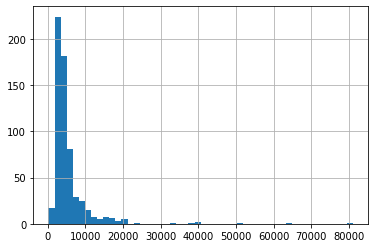

In [20]:
 import matplotlib.pyplot as plt
df.ApplicantIncome.hist(bins=50)
plt.show()

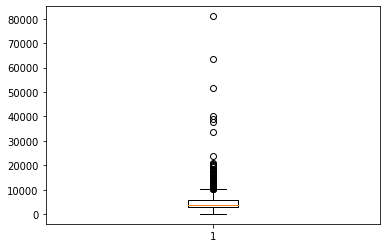

In [21]:
plt.boxplot(df.ApplicantIncome)
plt.show()

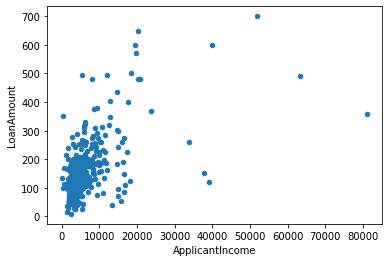

In [23]:
# ScatterPlot to see the relation of ApplicantIncome and LoanAmount
df.plot(kind="scatter", x='ApplicantIncome', y='LoanAmount')
plt.show()

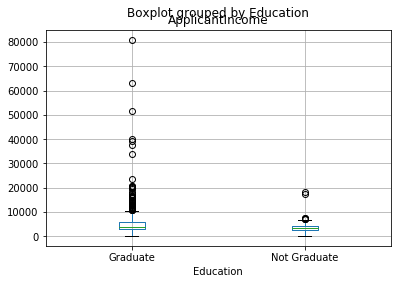

In [24]:
## Boxplot that grouped by some feature 
df.boxplot(column='ApplicantIncome', by='Education')
plt.show()

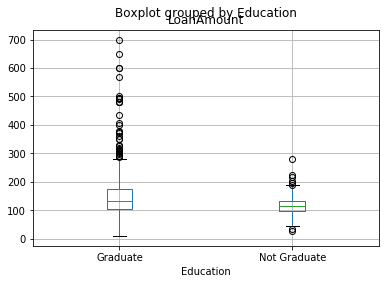

In [25]:
df.boxplot(column='LoanAmount', by='Education')
plt.show()

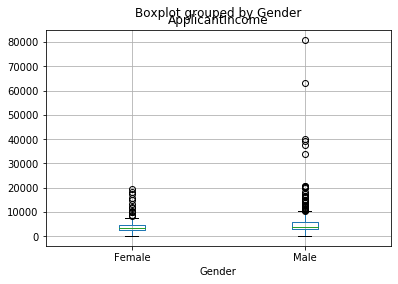

In [26]:
df.boxplot(column='ApplicantIncome', by='Gender')
plt.show()

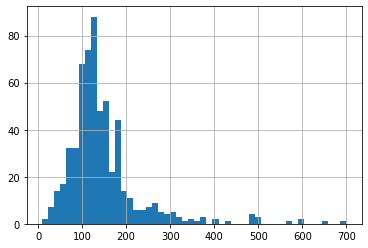

In [27]:
## Check histogram of 'LoanAmount'
df.LoanAmount.hist(bins=50)
plt.show()

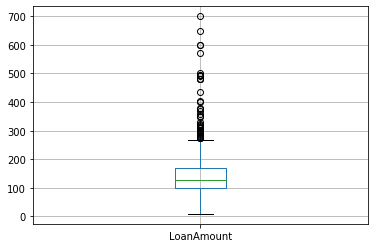

In [28]:
df.boxplot(column='LoanAmount')
plt.show()

## Frequency table, Pivot Table, Cross Table

# Frequency table

In [33]:
temp1 = df.Credit_History.value_counts(ascending=True)
print('Frequency table for Credit History: ')
print(temp1)

Frequency table for Credit History: 
0.0     89
1.0    475
Name: Credit_History, dtype: int64


In [34]:
temp2 = df.Property_Area.value_counts(ascending=True)
print('Frequency table for Property_Area: ')
print(temp2)

Frequency table for Property_Area: 
Rural        179
Urban        202
Semiurban    233
Name: Property_Area, dtype: int64


In [37]:
# Pivot table
temp3 = df.pivot_table(values='Loan_Status', index=['Credit_History'], aggfunc=lambda x: x.map({'Y': 1, 'N': 0}).mean() )
print('Probability of getting Loan for each Credit History class:')
print(temp3)

Probability of getting Loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


In [38]:
temp4 = df.pivot_table(values='Loan_Status', index=['Education'], aggfunc=lambda x: x.map({'Y': 1, 'N': 0}).mean() )
print('Probability of getting Loan for each Education class:')
print(temp4)

Probability of getting Loan for each Education class:
              Loan_Status
Education                
Graduate         0.708333
Not Graduate     0.611940


In [39]:
temp5 = df.pivot_table(values='ApplicantIncome', index=['Education'])
print('Probability of getting Loan for each Education class:')
print(temp5)

Probability of getting Loan for each Education class:
              ApplicantIncome
Education                    
Graduate          5857.433333
Not Graduate      3777.283582


# Visualization of data

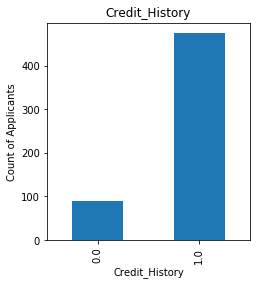

In [42]:
## Applicant by Credit_History
fig = plt.figure(figsize=(8, 4))
axl = fig.add_subplot(121)
axl.set_xlabel('Credit_History')
axl.set_ylabel('Count of Applicants')
axl.set_title('Credit_History')
temp1.plot(kind='bar')
plt.show()

/Users/t_ishikawa/workspace/python_work/my-python-scripts-and-notebooks/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


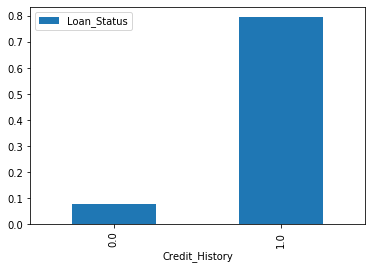

In [44]:
# Loan Status by Credit History
ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title('Probability of getting loan by Credit History')
temp3.plot(kind='bar')
plt.show()

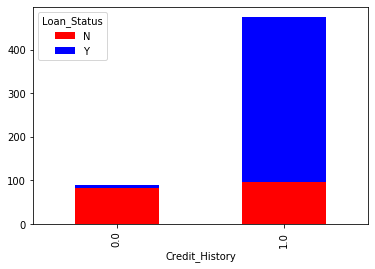

In [48]:
# Cross table visualization
temp_4 = pd.crosstab(df.Credit_History, df.Loan_Status)
temp_4.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.show()

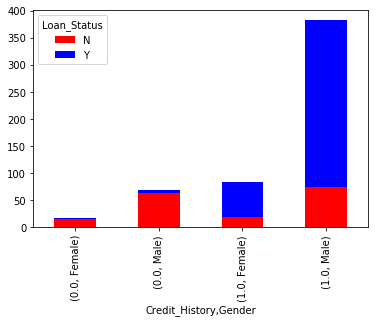

In [50]:
# Add 'Gender' into that cross table
temp_5 = pd.crosstab([df.Credit_History, df.Gender], df.Loan_Status)
temp_5.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.show()

In [55]:
# Check missing value
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [52]:
df.LoanAmount.head(10)

0      NaN
1    128.0
2     66.0
3    120.0
4    141.0
5    267.0
6     95.0
7    158.0
8    168.0
9    349.0
Name: LoanAmount, dtype: float64

In [54]:
# Fill up missing values
df.LoanAmount.fillna(df.LoanAmount.mean(), inplace=True)

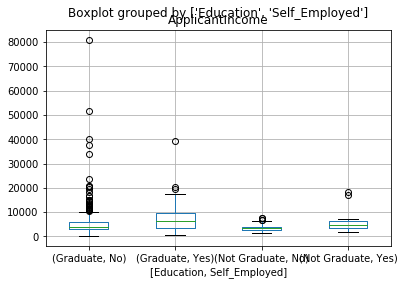

In [56]:
# More complicated box plot
df.boxplot(column='ApplicantIncome', by=['Education', 'Self_Employed'])
plt.show()

/Users/t_ishikawa/workspace/python_work/my-python-scripts-and-notebooks/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


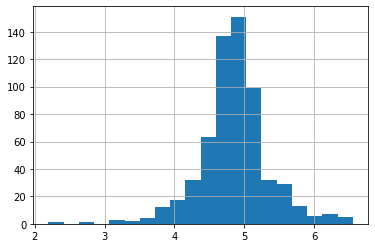

In [57]:
# log transformation
df.LoanAmount_log = np.log(df.LoanAmount)
df.LoanAmount_log.hist(bins=20)
plt.show()

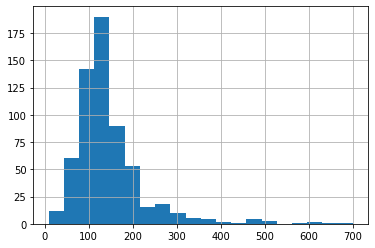

In [58]:
df.LoanAmount.hist(bins=20)
plt.show()

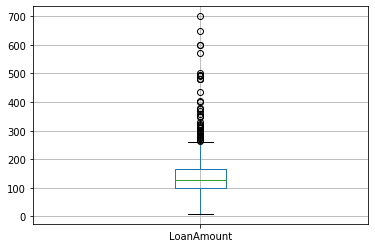

In [59]:
df.boxplot(column='LoanAmount')
plt.show()

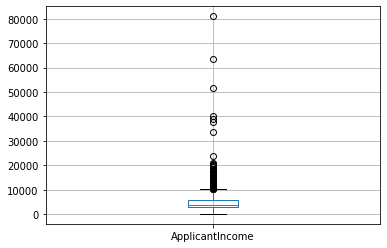

In [62]:
df.boxplot(column='ApplicantIncome')
plt.show()

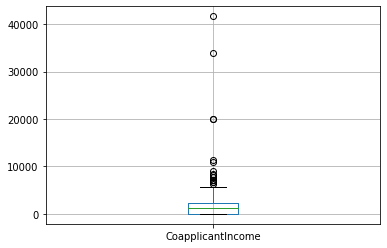

In [63]:
df.boxplot(column='CoapplicantIncome')
plt.show()

In [64]:
df.TotalIncome = df.ApplicantIncome + df.CoapplicantIncome

/Users/t_ishikawa/workspace/python_work/my-python-scripts-and-notebooks/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [65]:
df.TotalIncome.head()

0    5849.0
1    6091.0
2    3000.0
3    4941.0
4    6000.0
dtype: float64

In [69]:
df['TotalIncome_log'] = np.log(df.TotalIncome)

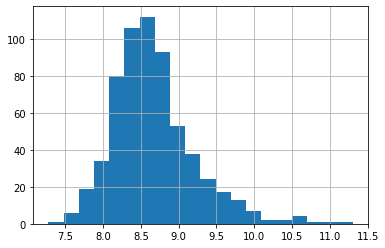

In [70]:
df.TotalIncome_log.hist(bins=20)
plt.show()

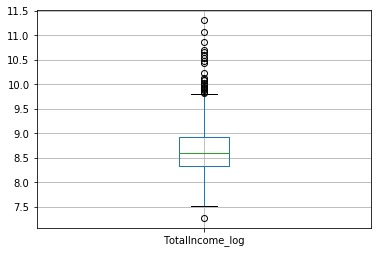

In [71]:
df.boxplot(column='TotalIncome_log')
plt.show()

In [73]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
TotalIncome_log       0
dtype: int64

In [75]:
train = df

In [77]:
# Fill missing values in train data
train['Gender'].fillna(train.Gender.mode()[0], inplace=True)
train['Married'].fillna(train.Married.mode()[0], inplace=True)
